# Import Libraries

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import joblib

# Load the Dataset

In [44]:
# Load the training dataset
train_data = pd.read_csv('student_data_train.csv')

# Load the testing dataset
test_data = pd.read_csv('student_data_test.csv')

## Analyze dataset

First Five Rows of Training Data
   Attendance (%)  Assignment Completion (%)  Test Score (25%)  \
0            14.8                       24.7              34.6   
1             9.7                       16.2              22.7   
2             2.8                        4.6               6.5   
3             8.6                       14.3              20.1   
4            11.0                       18.4              25.7   

   Practical Score (25%)  Exam Score (50%) Total Grade  Age  Gender  \
0                   14.8               9.9           A   24  Female   
1                    9.7               6.5           A   24    Male   
2                    2.8               1.9           A   20  Female   
3                    8.6               5.7           A   18    Male   
4                   11.0               7.4           A   19  Female   

  Marital Status  Children (if Married) Mother Education   Father Education  \
0        Married                      2  Master's Degree  Bachel

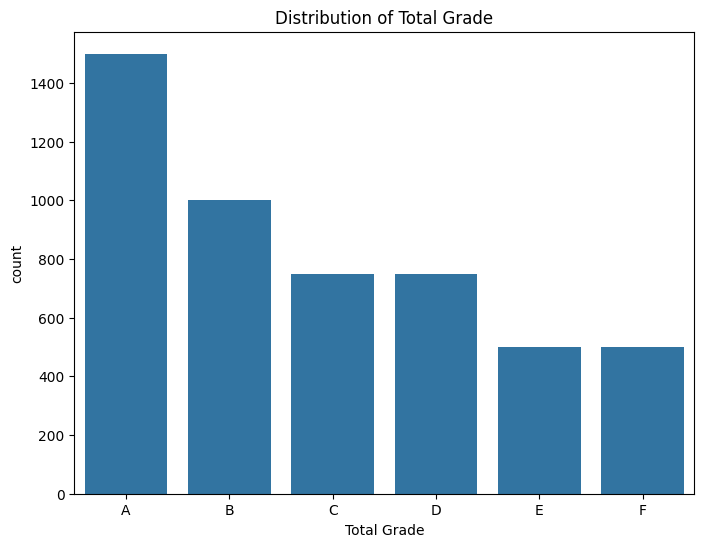

In [45]:
# Display the first few rows of the training dataset
print("First Five Rows of Training Data")
print(train_data.head())

# Display summary statistics of the training dataset
print("Summary Statistics of Training Data")
print(train_data.describe())

# Check for missing values in the training dataset
print("Checking for missing valuse in Training Data")
print(train_data.isnull().sum())

# Visualize the distribution of the target variable 'Total Grade'
plt.figure(figsize=(8, 6))
sns.countplot(x='Total Grade', data=train_data)
plt.title('Distribution of Total Grade')
plt.show()

# Data Preprocessing

In [46]:
# Separate features (X) and target variable (y)
X = train_data.drop('Total Grade', axis=1)
y = train_data['Total Grade']

# Convert non-numeric columns to categorical data type
non_numeric_columns = ['Gender', 'Marital Status', 'Mother Education', 'Father Education', 'Guardian (Sponsor)', 'Extracurricular Activities', 'Family Relationship', 'Free Time Activities', 'Alcoholic Consumption', 'Computer/Laptop Access (for Practicals)']
for column in non_numeric_columns:
    X[column] = X[column].astype('category')

# Encode categorical variables
X_encoded = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (4000, 4868) (4000,)
Testing set shape: (1000, 4868) (1000,)


# Training the model

In [47]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# View classification report
print(classification_report(y_test, y_pred))

# Save the trained model to a file
joblib.dump(clf, 'decision_tree_classifier_model.joblib')

print("Model saved successfully.")

Accuracy: 0.989
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       321
           B       0.99      0.99      0.99       179
           C       0.98      0.99      0.98       152
           D       0.99      0.98      0.98       156
           E       0.96      0.99      0.98        81
           F       0.99      0.97      0.98       111

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

Model saved successfully.


# Confusion Matrix

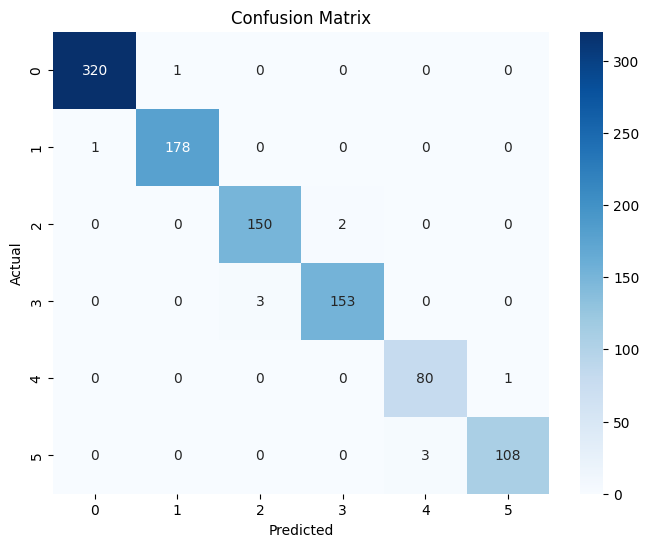

In [48]:
# Plot confusion matrix
plt.figure(figsize=(8, 6)) 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show() 


# Feature Importance

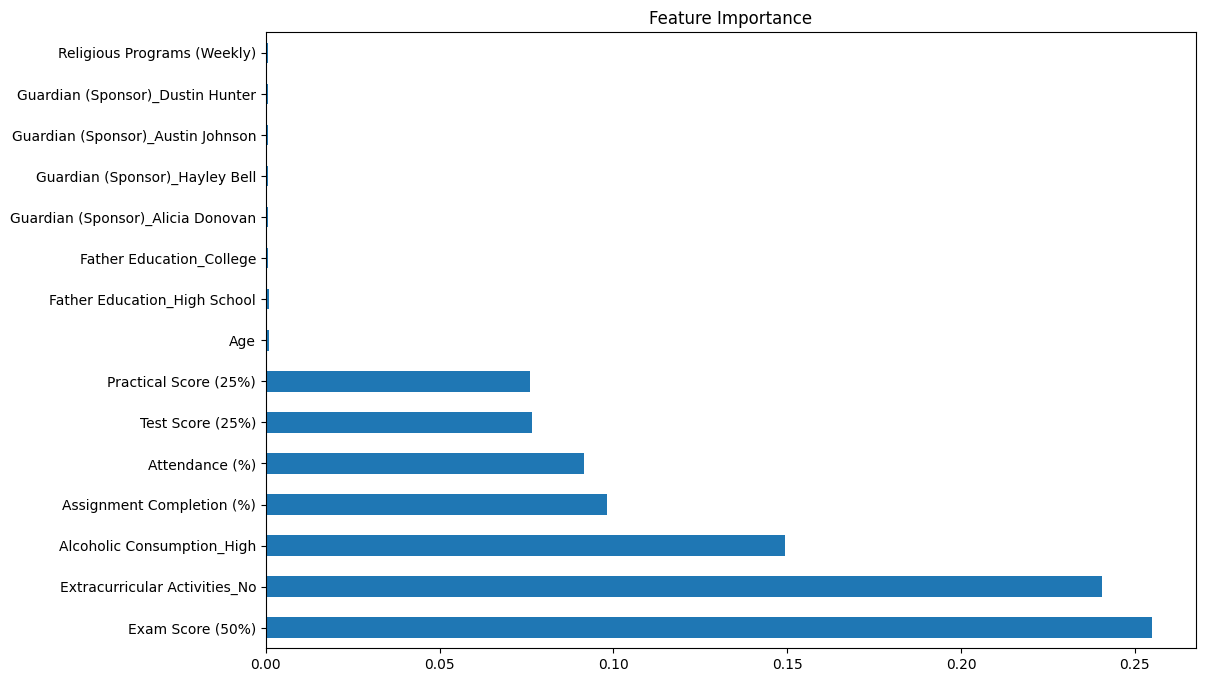

In [49]:
# Plot feature importance 
plt.figure(figsize=(12, 8)) 
feat_importances = pd.Series(clf.feature_importances_, index=X_encoded.columns) 
feat_importances.nlargest(15).plot(kind='barh') 
plt.title('Feature Importance') 
plt.show() 

# Visualizing the decision tree

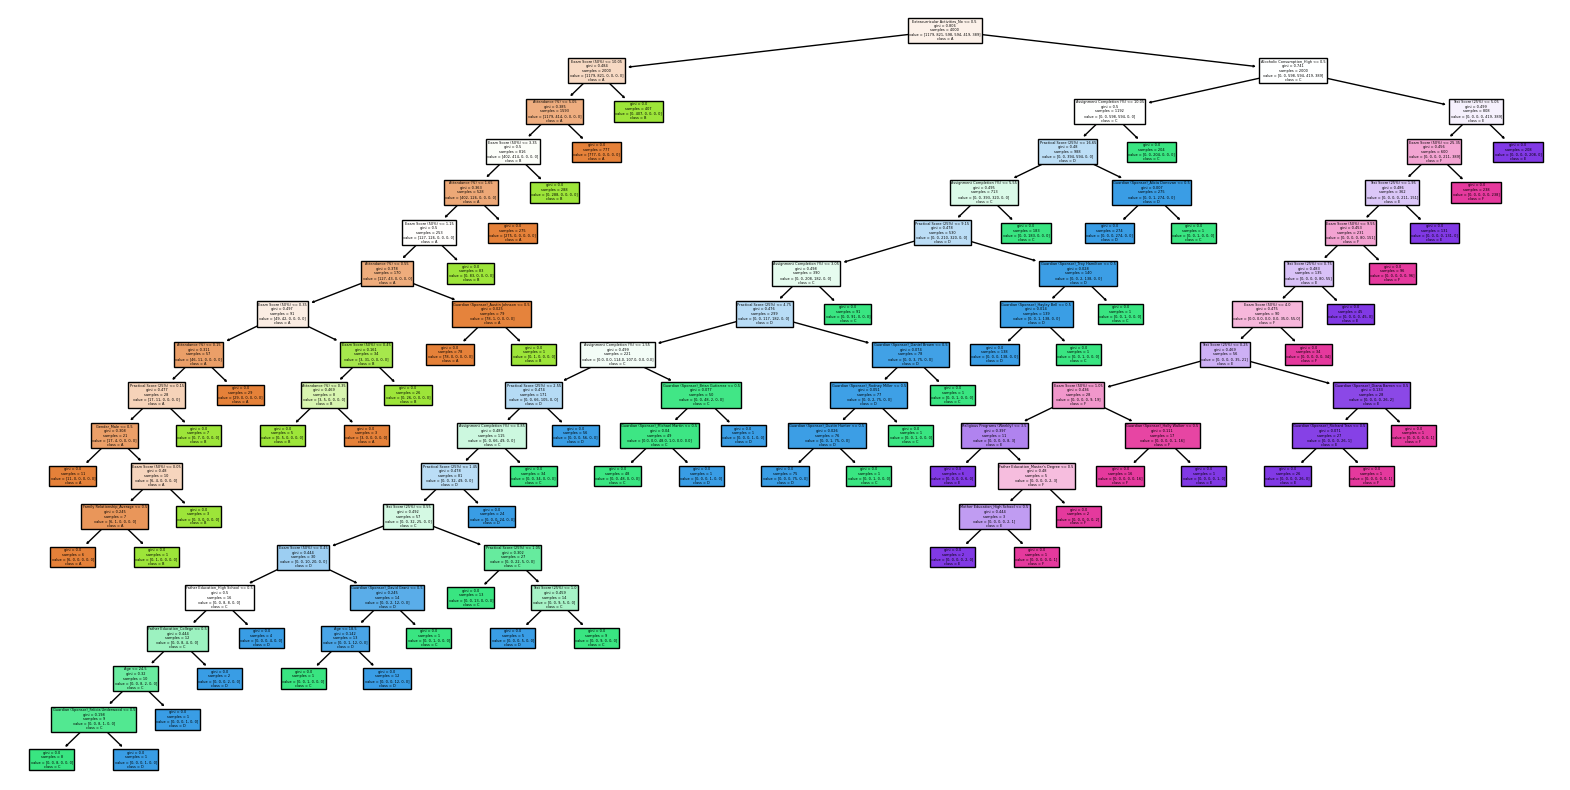

In [50]:
# Visualize the decision tree 
plt.figure(figsize=(20, 10)) 
plot_tree(clf, feature_names=X_encoded.columns, class_names=clf.classes_, filled=True) 
plt.show() 